# SMS classification case study

Given SMS dataset, we have to classify the sms based on 'spam' or 'ham' category. To do this classification we will use 'Naive Bayes' classifier.

In [1]:
# import necessary libraries

import numpy as np
import pandas as pd

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_curve

import matplotlib.pyplot as plt

In [2]:
# load the data

data = pd.read_csv('smsspamcollection.csv', header = None)
data.columns = ['Class', 'Document']
data.head()

,Class,Document
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data.shape

(5572, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Class     5572 non-null   object
 1   Document  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
# check spam-ham counts

data['Class'].value_counts()

Class
ham     4825
spam     747
Name: count, dtype: int64

In [6]:
data['Class'].value_counts()*100 / data.shape[0]

Class
ham     86.593683
spam    13.406317
Name: count, dtype: float64

There are 13.41% of spam class in the dataset, which can be fine in this classification. Spam % is important as business preference is to filter spam message from the set of messages.

In [7]:
# data pre-processing

data['Class'] = data['Class'].map({'spam': 1, 'ham': 0})
data.head()

,Class,Document
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# split train and test data

train_data, test_data = train_test_split(data, train_size=0.7, test_size=0.3, random_state=100)

In [9]:
train_data.shape

(3900, 2)

In [10]:
test_data.shape

(1672, 2)

In [11]:
# create X_train and y_train

X_train = np.array(train_data['Document'])
y_train = np.array(train_data['Class'])

In [12]:
# create X_test and y_test

X_test = np.array(test_data['Document'])
y_test = np.array(test_data['Class'])

In [13]:
# tokenize the X_train (create word of bag)

cv = CountVectorizer(stop_words='english')
cv.fit(X_train)
X_train_transform = cv.transform(X_train)

In [14]:
# build multinomial naive bayes model

mnb = MultinomialNB()
mnb.fit(X_train_transform, y_train)

y_train_pred = mnb.predict(X_train_transform)
y_train_pred_prob = mnb.predict_proba(X_train_transform)

### Model evaluation on train set

In [15]:
# compute model accuracy on train set

accuracy_score(y_train, y_train_pred)

0.9938461538461538

In [16]:
# compute confusion metrics

confusion = confusion_matrix(y_train, y_train_pred)
confusion

array([[3366,   11],
       [  13,  510]], dtype=int64)

In [17]:
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]

In [18]:
# compute senstivity and specificity on trained set

sensitivity = TP / (TP+FN)
specificity = TN / (TN+FP)

In [19]:
sensitivity

0.9751434034416826

In [20]:
specificity

0.996742671009772

In [21]:
precision = TP / (TP+FP)
precision

0.9788867562380038

In [22]:
# compute precesion

precision_score(y_train, y_train_pred)

0.9788867562380038

In [23]:
# compute recall

recall_score(y_train, y_train_pred)

0.9751434034416826

In [24]:
# plot ROC curve for train set

fpr, tpr, threshold = roc_curve(y_train, y_train_pred_prob[:,1])

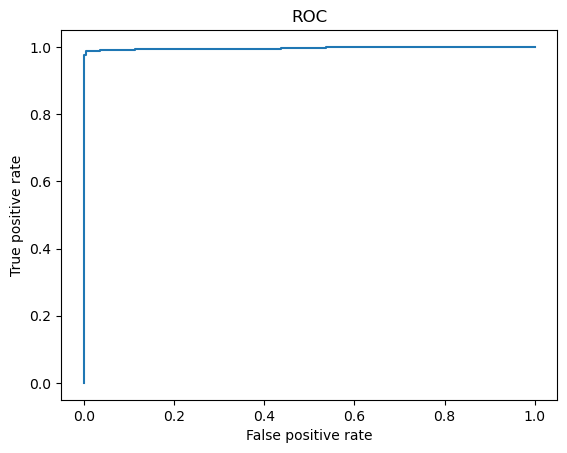

In [25]:
plt.plot(fpr, tpr)
plt.title('ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [26]:
pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'threshold': threshold})

,fpr,tpr,threshold
0,0.000000,0.000000,inf
1,0.000000,0.369025,1.000000e+00
2,0.000000,0.393881,1.000000e+00
3,0.000000,0.409178,1.000000e+00
4,0.000000,0.414914,1.000000e+00
...,...,...,...
421,0.992005,1.000000,2.284575e-17
422,0.992893,1.000000,1.961114e-17
423,0.997927,1.000000,4.456999e-26
424,0.998816,1.000000,6.925948e-32


### Model evaluation on test set

In [27]:
# evaluation on test data

X_test_transformed = cv.transform(X_test)

In [28]:
# prediction on test set

y_test_pred = mnb.predict(X_test_transformed)
y_test_pred_prob = mnb.predict_proba(X_test_transformed)

In [29]:
# compute accuracy on test set

accuracy_score(y_test, y_test_pred)

0.9844497607655502

In [30]:
# confusion matrix

confusion = confusion_matrix(y_test, y_test_pred)
confusion

array([[1438,   10],
       [  16,  208]], dtype=int64)

In [31]:
# compute sensitivity and specificity

TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]

sensitivity = TP / (TP+FN)
specificity = TN / (TN+FP)

In [32]:
sensitivity

0.9285714285714286

In [33]:
specificity

0.9930939226519337

In [34]:
precision_score(y_test, y_test_pred)

0.9541284403669725

In [35]:
recall_score(y_test, y_test_pred)

0.9285714285714286

In [36]:
# plot roc curve

fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob[:,1])

In [37]:
pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'threshold': threshold})

,fpr,tpr,threshold
0,0.000000,0.000000,inf
1,0.000000,0.308036,1.000000e+00
2,0.000000,0.321429,1.000000e+00
3,0.000000,0.330357,1.000000e+00
4,0.000000,0.339286,1.000000e+00
...,...,...,...
172,0.979282,1.000000,4.922197e-14
173,0.980663,1.000000,4.592807e-14
174,0.981354,1.000000,2.489572e-14
175,0.982735,1.000000,1.595609e-14


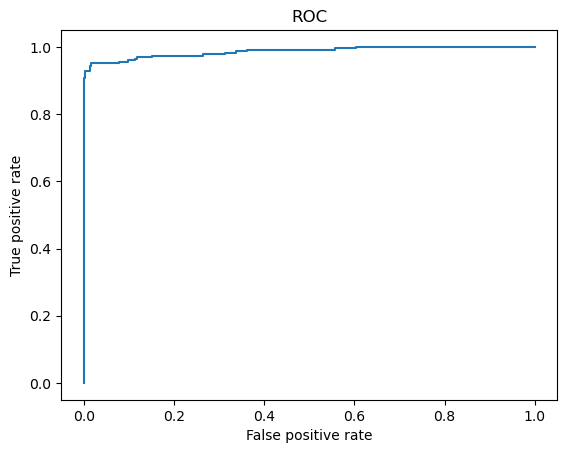

In [38]:
plt.plot(fpr, tpr)
plt.title('ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()